# Link to code: https://github.com/Vazquez-Michael-V/570_homework/blob/main/assignment_1.ipynb

# Imports.

In [99]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os

from IPython import get_ipython
from IPython.display import Image, display




# Functions.

In [48]:
def summary_statistics(df: pd.DataFrame, stats_col_name: str, date_col_name: str) -> dict:

    """
    Use this function to find the summary statistics discussed in the slides, "Lecture2_SP2026.pdf".

    Parameters
    ----------
    df : pd.DataFrame
        Passed DataFrame containing stats_col_name and date_col_name.
    stats_col_name : str
        Column on which to calculate the summary statistics.
    date_col_name : str
        Column on which to find min and max date.

    Returns
    -------
    dict
        Key 'df_summary_stats' contains the DataFrame of summary statistics.
        Key 'min_date' is the minimum of date_col_name.
        Key 'max_date' is the maximum of date_col_name.

    """

    df_summary_stats = pd.DataFrame(
    data={
        'mean': [df[stats_col_name].mean()],
        'median': [df[stats_col_name].median()],
        'var': [df[stats_col_name].var()],
        'std_dev': [df[stats_col_name].std()],
        'skewness': [df[stats_col_name].skew()],
        'kurtosis': [df[stats_col_name].kurtosis()]
        }
    ).T\
    .reset_index(names='statistic')\
    .rename(columns={0: 'value'}, errors='raise')\
    .round(4)

    return {
        'df_summary_stats': df_summary_stats,
        'min_date': df[date_col_name].min(),
        'max_date': df[date_col_name].max()
        }


# Notebook variables.

In [49]:
assignment_1_dir = os.getenv("ECON_570_ASSIGNMENT_1_DIR")
assignment_1_images_dir = os.getenv("ECON_570_ASSIGNMENT_1_IMAGES_DIR")


# Question 1.0 - Download and prep data.

## INDPRO data downloaded from FRED, no edits to data before download:<br>https://fred.stlouisfed.org/series/INDPRO#

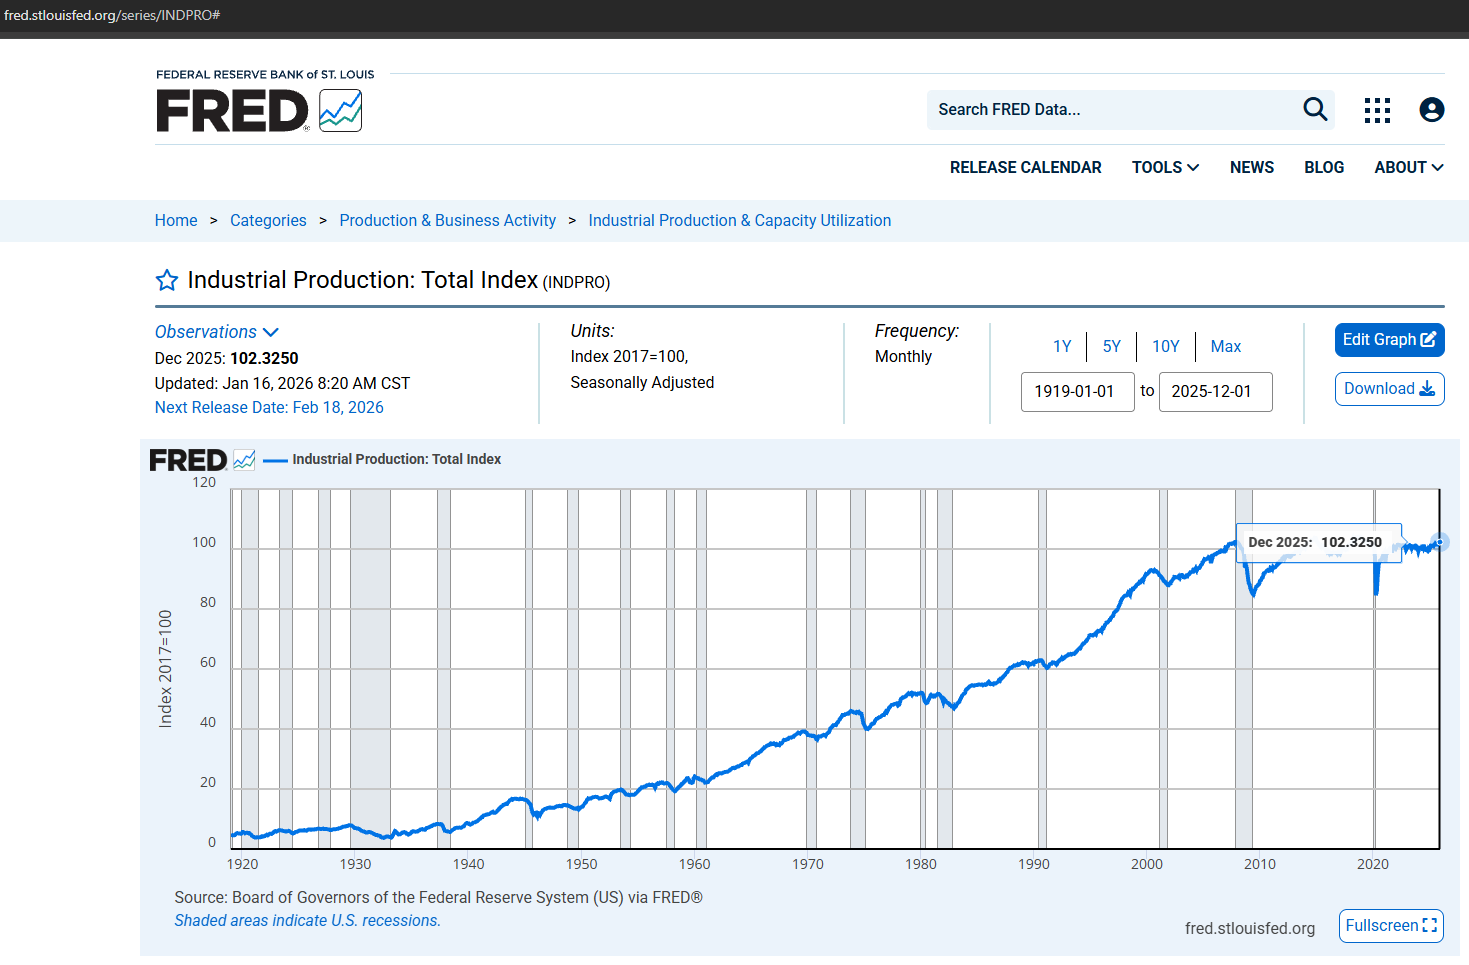

In [50]:
display(Image(rf'{assignment_1_images_dir}\\fred_indpro_download.png'))

## Read the downloaded csv and assign dtypes.

In [51]:
df_indpro = pd.read_csv(rf"{assignment_1_dir}\\INDPRO.csv")
df_indpro['observation_date'] = pd.to_datetime(df_indpro['observation_date'])
df_indpro = df_indpro.rename(columns={'INDPRO': 'indpro'})

print(df_indpro.info())
print(f"df_indpro shape: {df_indpro.shape}")
print("Successfully read INDPRO file.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  1284 non-null   datetime64[ns]
 1   indpro            1284 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.2 KB
None
df_indpro shape: (1284, 2)
Successfully read INDPRO file.


## Add additional timeframe columns.

In [52]:
df_indpro = df_indpro.assign(
    year_quarter = pd.PeriodIndex(
        df_indpro['observation_date'],
        freq='Q'
    ),
    year_month = df_indpro['observation_date'].dt.strftime("%Y%m").astype('int64')
)

print(df_indpro.info())
print(f"df_indpro shape: {df_indpro.shape}")
print("Additional timeframe columns have been assigned.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  1284 non-null   datetime64[ns]
 1   indpro            1284 non-null   float64       
 2   year_quarter      1284 non-null   period[Q-DEC] 
 3   year_month        1284 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), period[Q-DEC](1)
memory usage: 40.3 KB
None
df_indpro shape: (1284, 4)
Additional timeframe columns have been assigned.


## Display some rows of df_indpro.

In [53]:
display(df_indpro.sample(n=10))

,observation_date,indpro,year_quarter,year_month
212,1936-09-01,7.5128,1936Q3,193609
728,1979-09-01,51.4597,1979Q3,197909
269,1941-06-01,11.2288,1941Q2,194106
1050,2006-07-01,99.0489,2006Q3,200607
529,1963-02-01,26.2544,1963Q1,196302
840,1989-01-01,62.2574,1989Q1,198901
362,1949-03-01,13.7600,1949Q1,194903
874,1991-11-01,62.0871,1991Q4,199111
929,1996-06-01,75.4433,1996Q2,199606
361,1949-02-01,14.0292,1949Q1,194902


# __ALL QUESTIONS__ - Create dictionaries for all 3 timeframes in the homework instructions.

In [ ]:
# Let's organize variables in a dictionary to avoid confusion.
# tf for timeframe.

# Timeframe containing all dates in the downloaded INDPRO data.
tf_all_dict = {'df': df_indpro}
tf_all_dict = tf_all_dict | summary_statistics(tf_all_dict['df'], 'indpro', 'observation_date')
assert tf_all_dict['min_date'] == pd.Timestamp(1919, 1, 1), "Minimum date of all timeframe data is not 1919-01-01."
assert tf_all_dict['max_date'] == pd.Timestamp(2025, 12, 1), "Maximum date of all timeframe data is not 2025-12-01."


# Timeframe from 2000-01 to present.
tf_00s_dict = {'df': df_indpro.loc[(df_indpro['observation_date'].between('2000-01-01', '2025-12-31')), :].copy()}
tf_00s_dict = tf_00s_dict | summary_statistics(tf_00s_dict['df'], 'indpro', 'observation_date')
assert tf_00s_dict['min_date'] == pd.Timestamp(2000, 1, 1), "Minimum date of the 00s data is not 2000-01-01."
assert tf_00s_dict['max_date'] == pd.Timestamp(2025, 12, 1), "Maximum date of the 00s data is not 2025-12-01."


# Timeframe from 2020-06 to present.
tf_20s_dict = {'df': df_indpro.loc[(df_indpro['observation_date'].between('2020-06-01', '2025-12-31')), :].copy()}
tf_20s_dict = tf_20s_dict | summary_statistics(tf_20s_dict['df'], 'indpro', 'observation_date')
assert tf_20s_dict['min_date'] == pd.Timestamp(2020, 6, 1), "Minimum date of the 20s data is not 2020-06-01."
assert tf_20s_dict['max_date'] == pd.Timestamp(2025, 12, 1), "Maximum date of the 20s data is not 2025-12-01."


display(tf_all_dict['df']['observation_date'].describe())
display(tf_00s_dict['df']['observation_date'].describe())
display(tf_20s_dict['df']['observation_date'].describe())


count                             1284
mean     1972-06-16 02:01:07.289719632
min                1919-01-01 00:00:00
25%                1945-09-23 12:00:00
50%                1972-06-16 00:00:00
75%                1999-03-08 18:00:00
max                2025-12-01 00:00:00
Name: observation_date, dtype: object

count                              312
mean     2012-12-15 17:23:04.615384576
min                2000-01-01 00:00:00
25%                2006-06-23 12:00:00
50%                2012-12-16 12:00:00
75%                2019-06-08 12:00:00
max                2025-12-01 00:00:00
Name: observation_date, dtype: object

count                               67
mean     2023-03-02 08:57:18.805970176
min                2020-06-01 00:00:00
25%                2021-10-16 12:00:00
50%                2023-03-01 00:00:00
75%                2024-07-16 12:00:00
max                2025-12-01 00:00:00
Name: observation_date, dtype: object

# Question 1.1, 1.2, and 1.3 - Summary statistics and plots.

## Question 1.1 - Summary statistics from 1919-01 to 2025-12.

In [138]:
print(f"Summary statistics, timeframe from {tf_all_dict['min_date'].strftime('%Y-%m')} to {tf_all_dict['max_date'].strftime('%Y-%m')}.")
display(tf_all_dict['df_summary_stats'])


Summary statistics, timeframe from 1919-01 to 2025-12.


,statistic,value
0,mean,46.7118
1,median,40.5312
2,var,1234.6693
3,std_dev,35.1379
4,skewness,0.3519
5,kurtosis,-1.3768


## Question 1.2 - Summary statistics from 2000-01 to 2025-12.

In [137]:
print(f"Summary statistics, timeframe from {tf_00s_dict['min_date'].strftime('%Y-%m')} to {tf_00s_dict['max_date'].strftime('%Y-%m')}.")
display(tf_00s_dict['df_summary_stats'])

Summary statistics, timeframe from 2000-01 to 2025-12.


,statistic,value
0,mean,97.2391
1,median,98.8828
2,var,22.4107
3,std_dev,4.7340
4,skewness,-0.7187
5,kurtosis,-0.5824


## Question 1.3 - Summary statistics from 2020-06 to 2025-12.

In [139]:
print(f"Summary statistics, timeframe from {tf_20s_dict['min_date'].strftime('%Y-%m')} to {tf_20s_dict['max_date'].strftime('%Y-%m')}.")
display(tf_20s_dict['df_summary_stats'])

Summary statistics, timeframe from 2020-06 to 2025-12.


,statistic,value
0,mean,100.0180
1,median,100.5726
2,var,3.5061
3,std_dev,1.8724
4,skewness,-2.2486
5,kurtosis,6.1790


# Question 1.4 - Plot the data.

## Boxplot for Question 1.

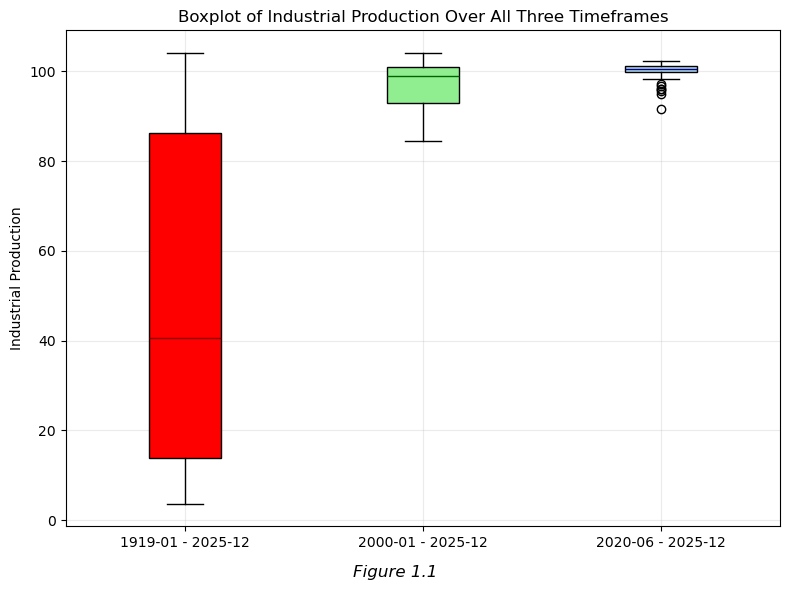

In [194]:
fig, ax = plt.subplots(figsize=(8, 6))

bp = ax.boxplot(
    [tf_all_dict['df']['indpro'], tf_00s_dict['df']['indpro'], tf_20s_dict['df']['indpro']],
    positions=[1, 2, 3],
    tick_labels=[
        f"{tf_all_dict['min_date'].strftime('%Y-%m')} - {tf_all_dict['max_date'].strftime('%Y-%m')}",
        f"{tf_00s_dict['min_date'].strftime('%Y-%m')} - {tf_00s_dict['max_date'].strftime('%Y-%m')}",
        f"{tf_20s_dict['min_date'].strftime('%Y-%m')} - {tf_20s_dict['max_date'].strftime('%Y-%m')}"
    ],
    patch_artist=True
)


box_colors = ['red', 'lightgreen', 'lightblue']
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)

median_colors = ['darkred', 'darkgreen', 'darkblue']
for median, color in zip(bp['medians'], median_colors):
    median.set_color(color)
    median.set_linewidth(1)


ax.set_ylabel('Industrial Production')
ax.set_title("Boxplot of Industrial Production Over All Three Timeframes")
ax.grid(True, alpha=0.25)

fig.text(0.5, 0.03, 'Figure 1.1', ha='center', fontsize=12, style='italic')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


## Line plot for Question 1.

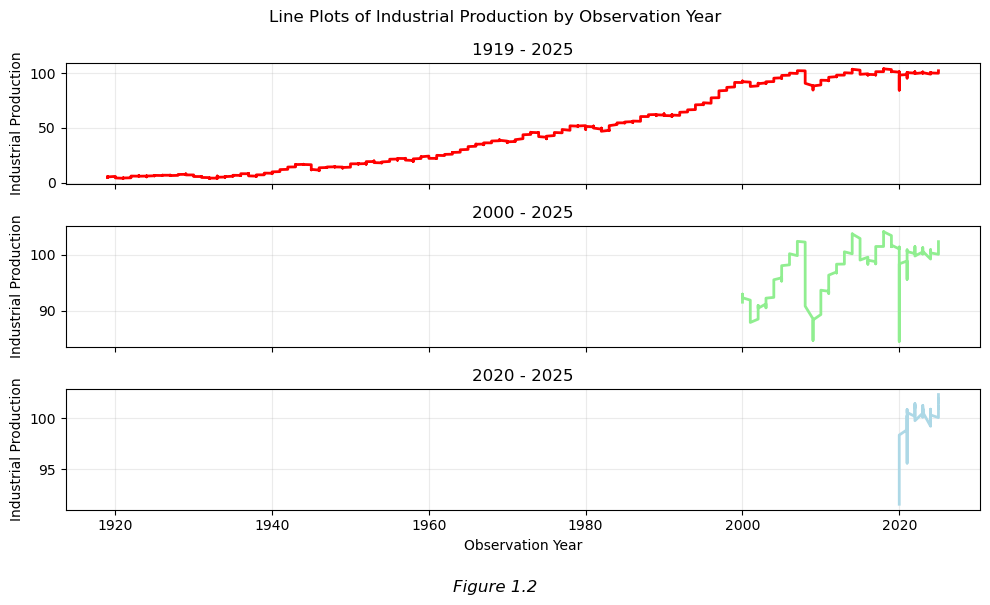

In [202]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 6), sharex=True, sharey=False)

# All dates, from 1919-01 to 2025-12.
axes[0].plot(tf_all_dict['df']['observation_date'].dt.year, tf_all_dict['df']['indpro'], label='all', color='red', linewidth=2)
axes[0].set_title(f"{tf_all_dict['min_date'].strftime('%Y')} - {tf_all_dict['max_date'].strftime('%Y')}")
axes[0].set_ylabel('Industrial Production')
axes[0].grid(True, alpha=0.25)

# 2000s, from 2000-01 to 2025-12
axes[1].plot(tf_00s_dict['df']['observation_date'].dt.year, tf_00s_dict['df']['indpro'], label='2000s', color='lightgreen', linewidth=2)
axes[1].set_title(f"{tf_00s_dict['min_date'].strftime('%Y')} - {tf_00s_dict['max_date'].strftime('%Y')}")
axes[1].set_ylabel('Industrial Production')
axes[1].grid(True, alpha=0.25)

# 2020s, from 2020-06 to 2025-12
axes[2].plot(tf_20s_dict['df']['observation_date'].dt.year, tf_20s_dict['df']['indpro'], label='2020s', color='lightblue', linewidth=2)
axes[2].set_title(f"{tf_20s_dict['min_date'].strftime('%Y')} - {tf_20s_dict['max_date'].strftime('%Y')}")
axes[2].set_ylabel('Industrial Production')
axes[2].set_xlabel('Observation Year')
axes[2].grid(True, alpha=0.25)

fig.suptitle("Line Plots of Industrial Production by Observation Year")
fig.text(0.5, 0.01, 'Figure 1.2', ha='center', fontsize=12, style='italic')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()
